<a href="https://colab.research.google.com/github/ardioputra/implementasi-IDG/blob/main/IDG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2022-01-18 07:43:29--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2022-01-18 07:43:30--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   163MB/s    in 

In [19]:
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [20]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Rook', 'Queen', 'Pawn', 'Bishop', 'Knight', 'King']

In [21]:
print('total pawn images :',len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total king images :',len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total knight images :',len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total king images : 76
total knight images : 106


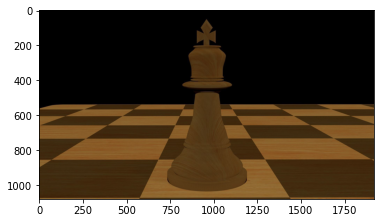

In [22]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   validation_split=0.1)

In [ ]:
train_gen = train_datagen.flow_from_directory(train_dir,
                                              target_size = (150,150),
                                              batch_size = 8,
                                              class_mode = 'categorical',
                                              subset = 'training')

val_gen = train_datagen.flow_from_directory(train_dir,
                                              target_size = (150,150),
                                              batch_size = 16,
                                              class_mode = 'categorical',
                                              subset = 'validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150,150,3))),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])

model.layers[0].trainable = False

234561536/234545216 [==============================] - 8s 0us/step


In [25]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
hist = model.fit(train_gen,
                 validation_data = val_gen,
                 epochs=50,
                 verbose=2)

Epoch 1/50
63/63 - 138s - loss: 9.5303 - accuracy: 0.4549 - val_loss: 2.1622 - val_accuracy: 0.6346 - 138s/epoch - 2s/step
Epoch 2/50
63/63 - 126s - loss: 1.8461 - accuracy: 0.6854 - val_loss: 2.5867 - val_accuracy: 0.6538 - 126s/epoch - 2s/step
Epoch 3/50
63/63 - 126s - loss: 1.0052 - accuracy: 0.7816 - val_loss: 1.9699 - val_accuracy: 0.6154 - 126s/epoch - 2s/step
Epoch 4/50
63/63 - 126s - loss: 0.7424 - accuracy: 0.8116 - val_loss: 1.5598 - val_accuracy: 0.6154 - 126s/epoch - 2s/step
Epoch 5/50
63/63 - 126s - loss: 0.8865 - accuracy: 0.7796 - val_loss: 1.4635 - val_accuracy: 0.6923 - 126s/epoch - 2s/step
Epoch 6/50
63/63 - 126s - loss: 0.7614 - accuracy: 0.8076 - val_loss: 1.7898 - val_accuracy: 0.6538 - 126s/epoch - 2s/step
Epoch 7/50
63/63 - 126s - loss: 1.0196 - accuracy: 0.8417 - val_loss: 1.1097 - val_accuracy: 0.6538 - 126s/epoch - 2s/step
Epoch 8/50
63/63 - 127s - loss: 0.7225 - accuracy: 0.8277 - val_loss: 2.0040 - val_accuracy: 0.6731 - 127s/epoch - 2s/step
Epoch 9/50
63/63

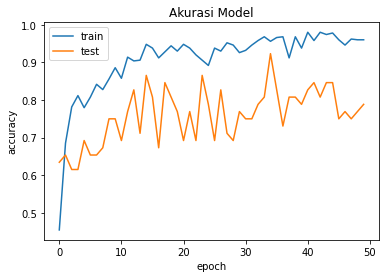

In [27]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

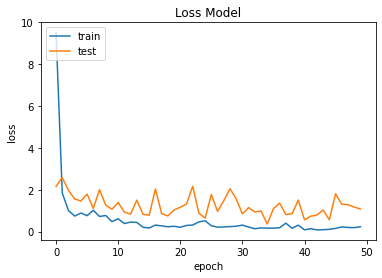

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()